In [2]:
import urllib.request
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm import tqdm
import time
import os
import shutil   # pip install shutil
import sys

In [3]:
keyword = input('검색어를 입력하세요: ')
count_down = int(input('스크롤 다운 횟수를 입력해 주세요(최대6): '))

검색어를 입력하세요: 토마호크
스크롤 다운 횟수를 입력해 주세요(최대6): 6


In [4]:
driver = webdriver.Chrome('c:/py_data/chromedriver.exe')
first_url = 'https://www.google.com/search?q='
second_url = '&tbm=isch&ved=2ahUKEwi0ifL_2-vwAhXKxosBHeh3AFAQ2-cCegQIABAA&oq='
last_url = '&gs_lcp=CgNpbWcQDFAAWABgipMHaABwAHgAgAEAiAEAkgEAmAEAqgELZ3dzLXdpei1pbWc&sclient=img&ei=n4mwYPS9OMqNr7wP6O-BgAU&bih=969&biw=1153&hl=ko'
driver.get(first_url+keyword+second_url+keyword+last_url)
time.sleep(2)

In [5]:
# 스크롤 높이 구하기
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(2)
    
    new_height = driver.execute_script('return document.body.scrollHeight')
    if new_height == last_height:
        try:
            driver.find_element_by_css_selector('#islmp > div > div > div > div > div.qvfT1 > div.YstHxe > input').click()
        except:
            print('End of Scroll')
            break
    last_height = new_height


End of Scroll


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmtZZXmC7iJ7KXLH_xJvIiT_UWXWL7Woc369zD242hqFQNkz66&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh4v9CJ1A21fs_zyeeEbbCpcoa_E0nburn6Hfq5q4q6upv_pOQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9fQ7YNH80QIvyRzK5cTAMLo6NyBxxPPMxw1Z6zQdVH-HV9Wxr&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeAoSw0UJIxf-MabdJgz0d-4G1pcqzknkm8vucScOLK3Wt_Qy1&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNUzgO7cWJ0veMwpm9KoI6hKvAMEBDCME-Rs1jHrk&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7bXThOVcHEzEE9Wua4sDShPpUD8ucyYYXRBC6c9k&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJmuHjQKbGH3UWWEwSNu3wGddW5d_wWCRvdW_Ndzmr5hES0tNJ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqkrhHp4loySqZX1qZXz7RkNcrvT5-GrsodTBytACjNhA_IXXs&usqp=CAU',
 'https://encrypted-tbn0
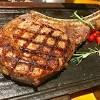
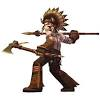
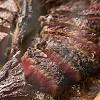
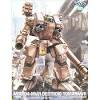
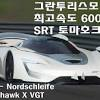
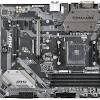
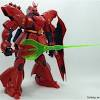
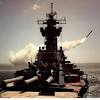
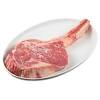
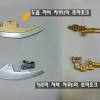
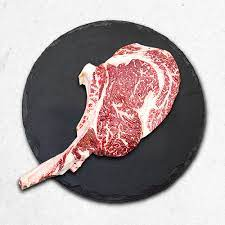
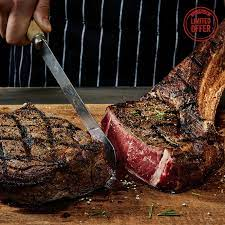
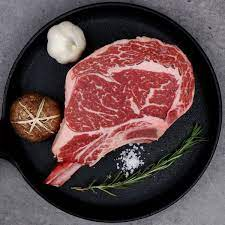
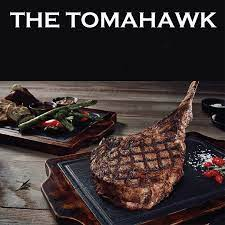
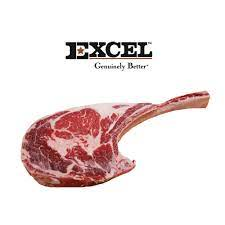
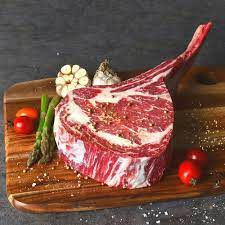
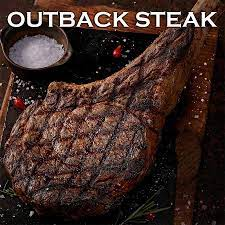
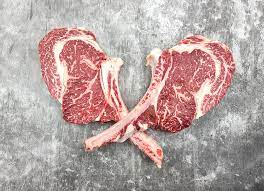
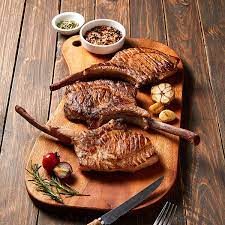
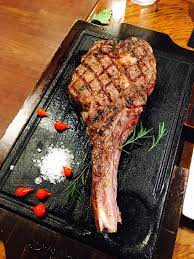
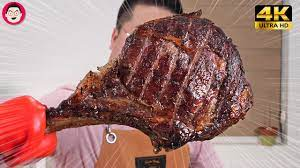
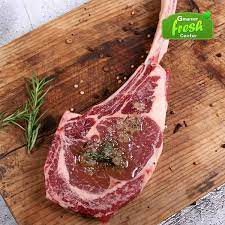
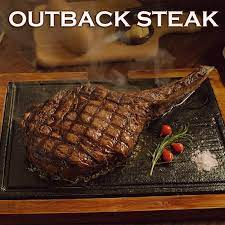
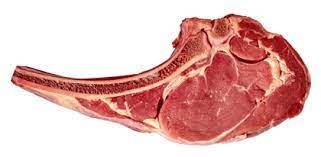
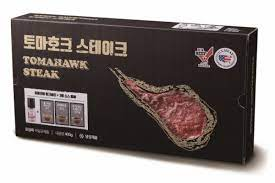
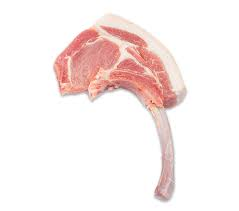
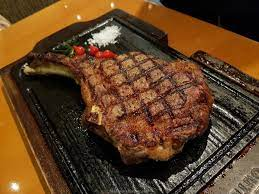
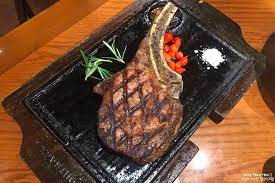
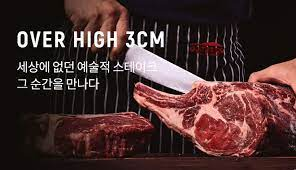
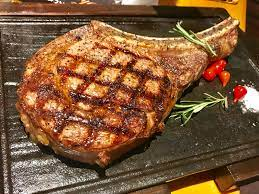

In [6]:
# 이미지 크롤링 
img_url_lst = []

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

tag_img = soup.find_all("img")
for url_num in tag_img:
    try:
        img_url_lst.append(url_num['src'])
    except:
        pass
    
img_url_lst

In [7]:
# 중복 url 제거
img_url_lst = list(set(img_url_lst))
len(img_url_lst)

450

In [10]:
# img_url_lst에 있는 url들에 접속하여 이미지 저장
fdir = 'c:/py_data/'
gen_fname = keyword + '_구글이미지크롤링' 

In [11]:
# 저장 디렉토리 만들기
list_dir = os.listdir(fdir)
for fname in list_dir:
    if gen_fname == fname:
        ck = input('동일한 이름의 폴더가 있습니다. 삭제 할까요>[y/n]')
        if ck == 'y' or ck =='ㅛ':
            shutil.rmtree(fdir+gen_fname)
        elif ck =='n' or ck == 'ㅜ':
            gen_frame = input('새로 생성할 폴더 이름을 입력하세요: ')
        else:
            print('잘못 누르셨습니다.')
            print('프로그램을 종료합니다.')
            driver.close()
            sys.exit()
try:
    os.makedirs(fdir+gen_fname)
except FileExistsError:
    gen_fname = input('동일한 폴더명이 있습니다 새로 입력해 주세요: ')
    os.makedirs(fdir+gen_fname)
    
i = 0
for img_url in tqdm(img_url_lst, desc='img saving...'):
    # URL내용 저장: urllib.request.urlretrieve('url주소', '파일경로.확장자')
    img_name = fdir + gen_fname + '/' + keyword + str(i) + '.jpg'
    urllib.request.urlretrieve(img_url, img_name)
    i += 1
driver.close()
print('완료 총',len(img_url_lst),'개의 이미지를 저장했습니다.')

img saving...: 100%|██████████| 450/450 [01:27<00:00,  5.14it/s]


완료 총 450 개의 이미지를 저장했습니다.


In [ ]:
import urllib.request
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm import tqdm
import time
import os
import shutil   # pip install shutil
import sys

keyword = input('검색어를 입력하세요: ')
count_down = int(input('스크롤 다운 횟수를 입력해 주세요(최대6): '))

driver = webdriver.Chrome('c:/py_data/chromedriver.exe')
first_url = 'https://www.google.com/search?q='
second_url = '&tbm=isch&ved=2ahUKEwi0ifL_2-vwAhXKxosBHeh3AFAQ2-cCegQIABAA&oq='
last_url = '&gs_lcp=CgNpbWcQDFAAWABgipMHaABwAHgAgAEAiAEAkgEAmAEAqgELZ3dzLXdpei1pbWc&sclient=img&ei=n4mwYPS9OMqNr7wP6O-BgAU&bih=969&biw=1153&hl=ko'
driver.get(first_url+keyword+second_url+keyword+last_url)
time.sleep(2)

# 스크롤 높이 구하기
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(2)
    
    new_height = driver.execute_script('return document.body.scrollHeight')
    if new_height == last_height:
        try:
            driver.find_element_by_css_selector('#islmp > div > div > div > div > div.qvfT1 > div.YstHxe > input').click()
        except:
            print('End of Scroll')
            break
    last_height = new_height

    
# 이미지 크롤링 
img_url_lst = []

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

tag_img = soup.find_all("img")
for url_num in tag_img:
    try:
        img_url_lst.append(url_num['src'])
    except:
        pass
    
# 중복 url 제거
img_url_lst = list(set(img_url_lst))
len(img_url_lst)

# img_url_lst에 있는 url들에 접속하여 이미지 저장
fdir = 'c:/py_data/'
gen_fname = keyword + '_구글이미지크롤링' 

# 저장 디렉토리 만들기
list_dir = os.listdir(fdir)
for fname in list_dir:
    if gen_fname == fname:
        ck = input('동일한 이름의 폴더가 있습니다. 삭제 할까요>[y/n]')
        if ck == 'y' or ck =='ㅛ':
            shutil.rmtree(fdir+gen_fname)
        elif ck =='n' or ck == 'ㅜ':
            gen_frame = input('새로 생성할 폴더 이름을 입력하세요: ')
        else:
            print('잘못 누르셨습니다.')
            print('프로그램을 종료합니다.')
            driver.close()
            sys.exit()
try:
    os.makedirs(fdir+gen_fname)
except FileExistsError:
    gen_fname = input('동일한 폴더명이 있습니다 새로 입력해 주세요: ')
    os.makedirs(fdir+gen_fname)
    
i = 0
for img_url in tqdm(img_url_lst, desc='img saving...'):
    # URL내용 저장: urllib.request.urlretrieve('url주소', '파일경로.확장자')
    img_name = fdir + gen_fname + '/' + keyword + str(i) + '.jpg'
    urllib.request.urlretrieve(img_url, img_name)
    i += 1
driver.close()
print('완료 총',len(img_url_lst),'개의 이미지를 저장했습니다.')